# 2. Computational Genomics

Genomics is a field of biology whose growth is strongly correlated to the development of computer technology and advancements in computer science. As DNA sequencing becomes cheaper and faster, entire DNA sequences of genes and organisms can now be easily and inexpensively sequenced, making a trove of genomic data readily available. Computational genomics is the field of study related to processing and analyzing this genomic data.

## 0. Review Basic String Functions
Since genomic data is most often found in the form of strings using the characters 'ATCG' to represent nucleotides, most of the functions you will be using to analyze genomic data will involve string manipulation. 

As mentioned in our previous module, a string is simply an ordered "collection" of symbols selected from some alphabet and formed into a word. The length of a string would simply be the number of symbols it contains. An example of a length 21 DNA string (whose alphabet contains the symbols 'A', 'C', 'G', and 'T') is "ATGCTTCAGAAAGGTCTTACG."

Luckily, Python has an extensive and robust string library that makes string manipulation very simple to code. Here is a crash course in string functions in Python:


In [1]:
word = 'Hello World!'
print word # Prints a string to console output
print len(word) # Prints the length of a string, including spaces
print word[:3] # Prints the first 3 characters of the string
print word[-3:] # Prints the last 3 characters of the string
print word[0] # Prints the first character of the string. Notice that strings start at index 0.
print word[3:7] # Prints the 4th through 7th character of the string. 

Hello World!
12
Hel
ld!
H
lo W


Notice that in the last line of code
<pre>
print word[3:7]
</pre>

gives us the 4th through 7th character in 'Hello World!'. The index position 3 actually corresponds to the 4th character in 'Hello World!' This is because in Python, strings start at index position 0. Also notice that the code asks for word[3:7]. Using the logic that strings start at index position 0, you would think that the index position 7 in word[3:7] would correspond to the 8th character in 'Hello World!' and that printing word[3:7] would result in 'lo Wo'. However, the "splicing" notation used here is inclusive on the first parameter 3 and exclusive on the second parameter 7, which means that word[3:7] actually prints out the 4th through 7th character in 'Hello World!' This inclusive/exclusive condition is true for all splicing in Python. Thus, if we wanted the 6th through 8th character in 'Hello World!', we would print word[5:8]. Please look up the Python documentation on your own time if you are still confused. Making sure indices are correct in any coding language is half the battle, and is especially important when dealing with genomic data where the exact position of each nucleotide is crucial!

Below are a couple more functions that you might find useful in this tutorial. I won't go into too much detail about why they work - you can look that up on your own time.

In [2]:
print word.count('l') # Prints the count of a specific character in word.
print word[::-1] # Prints the reverse of the string
print word.replace('l', 'r') # Replaces all instances of the first parameter with the second parameter
for i in word: # In python, you can treat strings as iterable arrays. This code will print each letter in word.
    print i

3
!dlroW olleH
Herro Worrd!
H
e
l
l
o
 
W
o
r
l
d
!


In [ ]:
# Practice some of the basic string functions here!

## 1. Importance of Algorithms
To illustrate the importance of computer science and algorithm design in the context of computational genomics, we will try to search for a specific sequence of nucleotides in the human chromosome 21, the smallest human chromosome.

Run the following code to import the sequence for chromosome 21 and store it in a variable called chr21.

In [3]:
f = open('chr21.fa')
seq = []
for ln in f:
    if ln[0] != '>':
        seq.append(ln.rstrip())
chr21 = ''.join(seq)

To illustrate why the efficiency of algorithms is important to think about, let's try to search for increasing lengths of the repeated adenine nucleotide on chromosome 21 and measure how much time it takes. Complete the code below to manually search for repeated sequences of 'A' of length 15 to 30 and compare the time it takes to finish searching the chromosome for these sequences.

In [74]:
import time

times1 = []

for # Complete for loop to iterate through lengths 15-30:
    start = time.time() #Keep track of the start time
    
    # Write code here that will create a string of length i of repeated 'A's and store it in a variable called 'nuc'
    # There are multiple ways to do this! Use the skills you learned from Module 1 or look up documentation.
    nuc = 
    
    for # Complete for loop to iterate through chromosome 21:
        if # Complete code  == nuc:
            break
            
    elapsed = # Complete code to calculate how much time has elapsed. Hint: look at code for start variable.
    print 'Elapsed time to search for length', i, 'is', elapsed, 'seconds'
    times1.append(elapsed)

In [9]:
# Answer
import time
%matplotlib inline
import matplotlib.pyplot as plt

times1 = []

for i in range(15, 31):
    start = time.time() #Keep track of the start time
    
    #Write code here that will create a string of length i of repeated 'A's and store it in a variable called 'nuc'
    #There are multiple ways to do this! Use the skills you learned from Module 1 or look up documentation.
    nuc = 'A' * i
    
    for j in range(len(chr21) - i):
        if chr21[j:j+i] == nuc:
            break
    elapsed = time.time() - start
    print 'Elapsed time to search for length', i, 'is', elapsed, 'seconds'
    times1.append(elapsed)

Elapsed time to search for length 15 is 7.91039299965 seconds
Elapsed time to search for length 16 is 6.80073094368 seconds


KeyboardInterrupt: 

In [ ]:
plt.plot(range(15,31), times1)
plt.ylabel('Elapsed Computation Time (seconds)')
plt.xlabel('Length of Sequence Searched For')
plt.show()

Found: True
Elapsed time to search for length 15 is 0.00304102897644 seconds
Found: True
Elapsed time to search for length 16 is 0.0056529045105 seconds
Found: True
Elapsed time to search for length 17 is 0.00474905967712 seconds
Found: True
Elapsed time to search for length 18 is 0.00501203536987 seconds
Found: True
Elapsed time to search for length 19 is 0.00649404525757 seconds
Found: False
Elapsed time to search for length 20 is 0.0244719982147 seconds
Found: False
Elapsed time to search for length 21 is 0.0213918685913 seconds
Found: False
Elapsed time to search for length 22 is 0.0278551578522 seconds
Found: False
Elapsed time to search for length 23 is 0.0180220603943 seconds
Found: False
Elapsed time to search for length 24 is 0.0221078395844 seconds
Found: False
Elapsed time to search for length 25 is 0.0184111595154 seconds
Found: False
Elapsed time to search for length 26 is 0.0160429477692 seconds
Found: False
Elapsed time to search for length 27 is 0.0149099826813 seconds


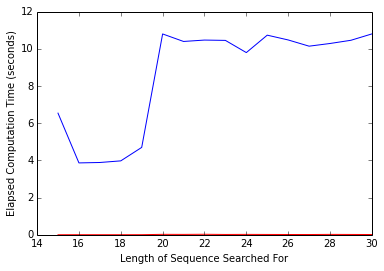

In [44]:
times2 = []

for i in range(15, 31):
    start = time.time() #Keep track of the start time
    
    #Write code here that will create a string of length i of repeated 'A's and store it in a variable called 'nuc'
    #Use your same code as above
    nuc = 'A' * i
    
    
    print 'Found:', nuc in chr21
    elapsed = time.time() - start #Complete code to calculate how much time as elapsed. Hint: look at code for start variable.
    print 'Elapsed time to search for length', i, 'is', elapsed, 'seconds'
    times2.append(elapsed)
    
plt.plot(range(15, 31), times1, 'b', range(15, 31), times2, 'r')
plt.ylabel('Elapsed Computation Time (seconds)')
plt.xlabel('Length of Sequence Searched For')
plt.show()

There are a couple of things to observe in the comparison between computation times that you have graphed above:
1. Observe how when we tried to write our own, "naive" algorithm to find a sequence of repeated 'A's in chromosome 21, the computation time is in the order of magnitude of seconds; however, when we use Python's built-in substring search function 'in', the computation time is on the order of hundredths of seconds or faster. This is because manually comparing strings using the == operator at every single index position in chr21 takes a very long time. When using the 'in' keyword, the makers of Python have implemented a very fast string search algorithm called Boyer-Moore that searches for substrings much faster than comparing the substring at every position in a string. This results in the hundredfold reduction in string search time.
2. Notice how in general, the longer the sequence we want to search for, the longer the computation time takes. Whether the computation time increases linearly, exponentially, or in some other mathematical relationship as the length of the sequence increases is known as the time-complexity of the string search algorithm. Time-complexity is a fundamental measurement of how efficient an algorithm is, and is very important to keep in mind when designing and implementing algorithms.

## 2. Basics of Genomics
Now that you have some newfound appreciation for computational genomics, let's explore some fundamentals - in both biology and lists!


$\textbf{Q2: Counting ACGT}$ Most of you may remember from high school biology that the ratio of A:T and G:C is exactly 1:1 in correctly paired double stranded DNA since A pairs with T and G pairs with C. This is known as Chargaff's Rule. What many of you may not know is that there is a second Chargaff's Rule that says that even among a single strand of DNA, the percentage of As is approximately the same as the percentage of Ts, and the percentage of Gs is approximately the same as the percengate of Cs. Let's check this rule for the single stranded sequence of chr21 that we have stored!

One way we can tackle this problem is by writing a for-loop, and for each symbol in the string, we check if it is one of the 4 alphabet symbols in the dna read.

In [13]:
def ACGTCount(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        Counts of "A", "C", "G", and "T" in a Tuple
    """
    A, C, G, T = 0, 0, 0, 0
    for base in dna:
        if base == "A":
            A += 1
        elif base == "C":
            C += 1
        elif base == "G":
            G += 1
        elif base == "T":
            T += 1
        else:
            return "Error. Not a valid DNA string!"
    
    return (A/float(len(dna)),C/float(len(dna)),G/float(len(dna)),T/float(len(dna)))
    
ACGTCount("ATGCGGTGCACTTTATGCGGACACTTCCTACAGGTAGCGTTGACCCTAATTTTGGTCGTCGGGTACGCAATCGCCGCCAGTTAAATAGCTTGCAACATACGTGGCCTTATGGTTACAGTATGCCCATCGCAGTTCGCTACACGCAGGACG")

(0.22, 0.26666666666666666, 0.25333333333333335, 0.26)

However, this implementation is rather long. Is there a package implementation within the "strings collection" that we can use?


 Given a DNA represented as a string, efficiently calculate the occurences of 'A', 'C', 'G', and 'T' as they occur in the string. Try doing this problem $\textbf{without}$ looping over every base pair!

In [20]:
# Problem
def ACGTCount(dna):
    """
    Parameters:
        dna - string containing 
    
    Return:
        Counts of "A", "C", "G", and "T" in a Tuple
    """
    return 

# Answer
def ACGTCount(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        Counts of "A", "C", "G", and "T" in a Tuple
    """
    return tuple([dna.count(base)/float(len(dna)) for base in "ACGT"])

ACGTCount("ATGCGGTGCACTTTATGCGGACACTTCCTACAGGTAGCGTTGACCCTAATTTTGGTCGTCGGGTACGCAATCGCCGCCAGTTAAATAGCTTGCAACATACGTGGCCTTATGGTTACAGTATGCCCATCGCAGTTCGCTACACGCAGGACG")

(0.22, 0.26666666666666666, 0.25333333333333335, 0.26)

$\textbf{Q3. Counting Point Mutations}$ Computational genomics is especially important in identifying specific genes and/or mutations. This is usually done by comparing an individual's genome to a reference genome, and looking at differences between the two. Let's try writing some code to compare a DNA sequence to a reference sequence.

In [79]:
# Problem
def CountPointMutations(ref, dna):
    """
    Parameters:
        ref - reference DNA String to be compared
        dna - DNA String to check
        
    Return:
        Number of Point Mutations 
    """
    return

# Solution
def CountPointMutations(ref, dna):
    """
    Parameters:
        ref - reference DNA String to be compared
        dna - DNA String to check
        
    Return:
        Number of Point Mutations 
    """
    return sum(1 for base1, base2 in zip(ref, dna) if base1 != base2)

reference = 'GAGCCTACTAACGGGAT'
DNA = 'CATCGTAATGACGGCCT'
CountPointMutations(reference, DNA)

7

# 3. Central Dogma of Molecular Biology

The central dogma of molecular biology describes the two-step process, transcription and translation, by which the information in genes flows into proteins: DNA → RNA → protein.

Transcription is the synthesis of an RNA copy of a segment of DNA, and Translation is the synthesis of RNA to its amino acid by RNA polymerase. In this module, we are going to program every step of this central dogma.



$\textbf{Q4. Finding the reverse complement of a DNA sequence}$ Finding the reverse complement is a little bit harder. Typically DNA is read 5' to 3'. This means that for double stranded DNA, the two strands are aligned with 5' and 3' ends opposite to each other. Thus, sometimes it is important to know the reverse complement of a single strand of the DNA. The reverse complement can be computed by first reversing a DNA sequence, and then taking the complement. 

An example of finding the reverse complement can be seen in the cell below. In the example, we reversed the dna string by subsetting it with "[::-1]", and for every base in the reverse string, we add its complement to a new string, called "reverseC".

In [62]:
def ReverseComplement(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        reverse - string as the reverse complement of DNA
    """
    reverseC = ""
    for base in dna[::-1]:
        if base == "A":
            reverseC += "T"
        elif base == "T":
            reverseC += "A"
        elif base == "G":
            reverseC += "C"
        else:
            reverseC += "G"
        
    return reverseC

DNA = 'AAAACCCGGT'
ReverseComplement1(DNA)

'ACCGGGTTTT'

Note, as you can see, there exists mapping A $\leftrightarrow$ T and G $\leftrightarrow$ C. We can encode this mapping inside a dictionary, which can be indexed very similarly to lists. As an example, $\textit{base_complement["A"]}$ of the example below should give $\textit{"T"}$. 

In [60]:
base_complement = {"A":"T", "T":"A", "G":"C", "C":"G"}
print "Complement of A is", base_complement["A"]
print "Complement of T is", base_complement["T"]
print "Complement of C is", base_complement["G"]
print "Complement of G is", base_complement["C"]

Complement of A is T
Complement of T is A
Complement of C is C
Complement of G is G


With this new powerful data structure/"collection", we can use dictionaries to drastically simpliy our code.

In [65]:
def ReverseComplement(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        reverse - string as the reverse complement of DNA
    """
    reverseC = ""
    base_complement = {"A":"T", "T":"A", "G":"C", "C":"G"}
 
    for base in dna[::-1]:
        reverseC += base_complement[base]
        
    return reverseC

DNA = 'AAAACCCGGT'
ReverseComplement(DNA)

'ACCGGGTTTT'

The way we can use lists are too many to be included in one module! Another way we can use lists and strings is the $\textit{"<delimination>".join(<list>)}$ command, which given a list, we can concatenate all of the elements together with a chosen "delimination" used to separate those elements.

An example of "join" in action can be seen below.

In [75]:
DNA_alphabet_list = ["A", "C", "G", "T"]
print "Joining a list with no delimination:", "".join(DNA_alphabet_list)
print "Joining a list with space delimination:", " ".join(DNA_alphabet_list)
print "Joining a list with comma+space delimination:", ", ".join(DNA_alphabet_list)

Joining a list with no delimination: ACGT
Joining a list with space delimination: A C G T
Joining a list with comma+space delimination: A, C, G, T


Remarkably, using list comprehensions and a couple of new string/list tricks, we can make this program even simpler, and actually return the results in only one line!

In [76]:
def ReverseComplement(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        reverse - string as the reverse complement of DNA
    """
    base_complement = {"A":"T", "T":"A", "G":"C", "C":"G"}
    return "".join([base_complement[base] for base in dna[::-1]])

DNA = 'AAAACCCGGT'
ReverseComplement(DNA)

'ACCGGGTTTT'

As succinct as that program is, it still uses a for-loop to iterate over every base in the DNA string. In typical Python fashion, if there already exists a string command that can perform that mapping for us, we should just use that package/implementation if possible, as built-in implementations are generally faster and more scalable. In our case, we might be working with DNA strings with millions of characters, and we want to limit the overhead/computation in Python as much as possible. This will also give you experience of "googling/stackoverflowing" documentation. In the next question, try writing the $\textit{ReverseComplement}$ function without any for loops. There are still plenty of ways to tackle this problem, but try using the "maketrans" method in the strings package.

In [49]:
def ReverseComplement(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        string as the reverse complement of DNA
    """
    from string import maketrans
    return

def ReverseComplement(dna):
    """
    Parameters:
        dna - string with length of at most 1000 base pairs
    
    Return:
        reverse - string as the reverse complement of DNA
    """
    from string import maketrans
    oldChars = "ACGT"
    newChars = "TGCA"
    rule = maketrans(oldChars, newChars)
    print(dna.translate(rule)[::-1])

DNA = 'AAAACCCGGT'
ReverseComplement1(DNA)

'ACCGGGTTTT'

$\textbf{Q5. Transcribing DNA into RNA}$ Iterating over the steps of the central dogma of molecular biology, let's try to transcribe DNA into RNA.

An RNA string is a string formed from the alphabet containing 'A', 'C', 'G', and 'U'. Given a DNA string corresponding to a coding strand, return its transcribed RNA string by replacing all occurrences of 'T' with 'U' in the reverse complement of the DNA string. Once again, we can write our own naive solution down below, but it might not be as fast.

In [82]:
def DNAtoRNA(dna):
    """
    Parameters:
        dna - DNA string
    
    Return:
        RNA sequence as a string
    """
    RNA = ""
    reversedC = ReverseComplement(dna)
    
    for base in reversedC:
        if base == "T":
            RNA += "U"
        else:
            RNA += base
    return reversedC

DNAtoRNA("ATGCGGTGCACTTTATGCGGACACTTCCTACAGGTAGCGTTGACCCTAATTTTGGTCGTCGGGTACGCAATCGCCGCCAGTTAAATAGCTTGCAACATACGTGGCCTTATGGTTACAGTATGCCCATCGCAGTTCGCTACACGCAGGACG")

'CGTCCTGCGTGTAGCGAACTGCGATGGGCATACTGTAACCATAAGGCCACGTATGTTGCAAGCTATTTAACTGGCGGCGATTGCGTACCCGACGACCAAAATTAGGGTCAACGCTACCTGTAGGAAGTGTCCGCATAAAGTGCACCGCAT'

Once again, try doing this problem without a for loop! There are a lot of great functions in the "string collection" of Python that could accomplish this problem.

In [78]:
# problem
def DNAtoRNA(dna):
    """
    Parameters:
        dna - DNA string
    
    Return:
        RNA sequence as a string
    """
    reversedC = ReverseComplement(dna)
    return 

# solution
def DNAtoRNA(dna):
    """
    Parameters:
        dna - DNA String
    
    Return:
        RNA sequence as a string
    """
    return ReverseComplement(dna).replace("T", "U")

DNAtoRNA("ATGCGGTGCACTTTATGCGGACACTTCCTACAGGTAGCGTTGACCCTAATTTTGGTCGTCGGGTACGCAATCGCCGCCAGTTAAATAGCTTGCAACATACGTGGCCTTATGGTTACAGTATGCCCATCGCAGTTCGCTACACGCAGGACG")

'CGUCCUGCGUGUAGCGAACUGCGAUGGGCAUACUGUAACCAUAAGGCCACGUAUGUUGCAAGCUAUUUAACUGGCGGCGAUUGCGUACCCGACGACCAAAAUUAGGGUCAACGCUACCUGUAGGAAGUGUCCGCAUAAAGUGCACCGCAU'

$\textbf{Q6A. Creating the Codon Table}$
The 20 commonly occurring amino acids are abbreviated by using 20 letters from the English alphabet (all letters except for B, J, O, U, X, and Z). Protein strings are constructed from these 20 symbols. Henceforth, the term genetic string will incorporate protein strings along with DNA/RNA strings. The RNA codon table dictates the details regarding the encoding of specific codons into the amino acid alphabet.

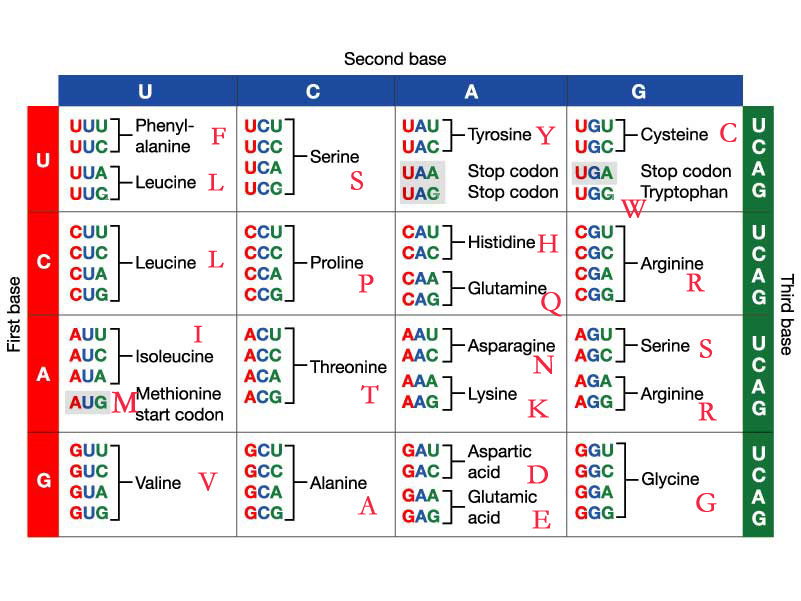

In [89]:
from IPython.display import Image
Image("aa.jpg")

Write a program/script that will automatically generate the codon table used to match codons to amino acids. Denote stop codon as a *.

Hint: We've used a dictionary in the past to map bases to their complement. A dictionary might help to match codons $\rightarrow$ amino acids

Double Hint: To programmatically create this table (without having to do it by hand), how can we use loops generate all possible codons? 

Triple Hint: You might have to use a double nested for loop (a for loop within a for loop within a for loop).

Quadruple Hint: If we know the order of which these codons are generated, it might be useful to all the amino acids in advance as a string. As an example, if the first 4 codons created are "UUU", "UUC", "UUA", "UUG",... we know the first 4 amino acids in this iteration must be "F", "F", "L", "L"..., which we can store as "FFLL...".

In [90]:
# Problem
def generateCodonTable():
    """
    Parameters:
        None
        
    Return:
        A dictionary that maps codons to amino acids
    """
    dictCodon = {} # We could have also initialized it as = dict(). Both are equivalent.
    return dictCodon

# Solution
def generateCodonTable():
    """
    Parameters:
        None
        
    Return:
        A dictionary that maps codons to amino acids
    """
    codons = [firCodon + secCodon + wobble for firCodon in "UCAG" for secCodon in "UCAG" for wobble in "UCAG"]
    aminoAcids = 'FFLLSSSSYY**CC*WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
    dictCodon = dict(zip(codons, aminoAcids))
    
    return dictCodon

$\textbf{Q6B. Transcribing RNA into Protein}$ We are at the last step of the Central Dogma! Given an RNA string and our Codon Table created previously, convert the RNA string to its corresponding amino acid sequence.

In [93]:
# Problem
def RNAtoProtein(rna):
    """
    Parameters:
        rna - RNA String
    
    Return:
        protein - amino acid sequence as a string
    """
    protein = ""
    return protein

# Solution
def RNAtoProtein(rna):
    """
    Parameters:
        rna - RNA String
    
    Return:
        protein - amino acid sequence as a string
    """
    protein = ""
    for i in list(range(0, len(rna), 3)):
        if dictCodon.get(rna[i:i+3]) != "*":
            protein = protein + dictCodon.get(rna[i:i+3])
        else:
            break
    return protein

## 3. Translating Open Reading Frames
While trascription and finding the reverse complement is somewhat trivial in Python, finding the amino acid sequence coded by a strand of DNA is not. This is because each amino acid is encoded by a nucleotide codon of length 3. This means that for a given strand of DNA, there are 6 ways (or "Open Reading Frames") to decipher the amino acid sequence: 3 ways reading the strand forwards, and 3 ways reading the strand in reverse. Let's try to find all valud amino acid sequences for the 6 open reading frames of the DNA sequence below:

In [8]:
def ORF(dna):
    """
    Parameters:
        dna - DNA String
        
        
    """
    dictCodon = generateCodonTable()
    
    orf = set()
    RNA_list = [DNAtoRNA(dna), DNAtoRNA(FormComplement(dna))]
    for rna in RNA_list:
        AUG_list = [m.start() for m in re.finditer('AUG', rna)]
        for aug in AUG_list:
            protein = ""
            temp_rna = rna[aug:]
            for i in range(0, len(temp_rna), 3):
                if i+3 <= len(temp_rna):
                    if dictCodon.get(temp_rna[i:i+3]) != "*":
                        protein = protein + str(dictCodon.get(temp_rna[i:i+3]))
                    else:
                        orf = orf.union([protein])
                        break
                    
    return orf

## 4. Summary
In this module, you now have a basic understanding of how to manipulate strings for genomic analysis in Python. You have seen the importance of algorithm design and selection by comparing the run times between an algorithm you wrote yourself and an algorithm native to Python. You have also explored some of the basics of computational genomics involving DNA and RNA. 

The new skills you have learned in this module are only a tiny fraction of what is involved in computational genomics. We haven't even explored doing computational statistical analysis on genomes. Currently, some exciting fields within computational genomics include finding new genes using algorithms, applications for personalized and precision medicine, and genetic testing. All of these fields use the various pieces of code you have written in this module!
